# Linear Regression model to predict house prices
Things done:  
1. Study the dataset first.
2. Do some scatter plots to see how variables are inter-related
3. Do some heatmap plot to see correlations
4. Clean the data (drop NA, drop capped values)
5. One hot encode any columns that is in text
6. Split the data into train and test set
7. use Linear_model from sklearn to fit the data
8. use r2 square to evaluate the predictions made by the model
9. plot some graph to compare the results

In [49]:
from sklearn.datasets import load_boston

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the data
## Basic numerical and statistical analysis

In [51]:
data = pd.read_csv("./datasets/california_housing.csv")

In [52]:
data.shape

(20640, 10)

In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
759,-122.08,37.66,33.0,1547.0,372.0,1063.0,356.0,2.5625,154300.0,NEAR BAY
20094,-120.03,38.19,26.0,7005.0,1358.0,416.0,189.0,2.1250,132500.0,INLAND
11773,-121.28,38.75,52.0,493.0,89.0,189.0,94.0,2.1080,83800.0,INLAND
3454,-118.41,34.32,18.0,6572.0,1105.0,3473.0,1067.0,5.2987,203400.0,<1H OCEAN
3052,-119.35,35.58,13.0,1657.0,362.0,1186.0,376.0,1.1903,63200.0,INLAND


In [55]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [57]:
data.shape

(20640, 10)

In [58]:
data = data.dropna()

In [59]:
data.shape

(20433, 10)

In [60]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [61]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Conclusions: 
The dataset is fairly clean. NA values were dropped. There is 1 categorical column. The rest are numerical. "median_house_value" is column that needs to be predicted.The mean, max and min values are seen by the describe function.

## Visual analysis

Text(0,0.5,'total bedrooms')

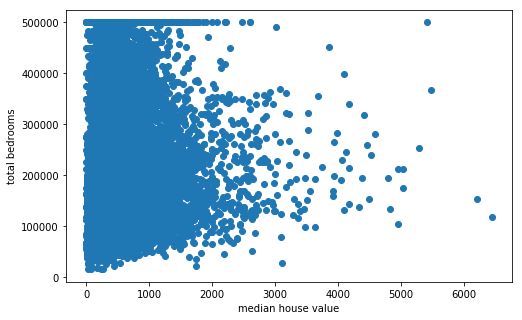

In [63]:
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(y=data["median_house_value"],
            x = data["total_bedrooms"])
plt.xlabel("median house value")
plt.ylabel("total bedrooms")

Text(0,0.5,'total bedrooms')

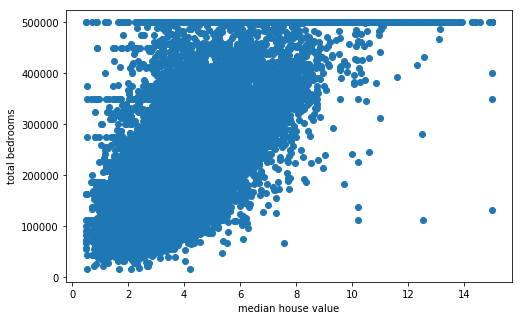

In [64]:
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(y=data["median_house_value"],
            x = data["median_income"])
plt.xlabel("median house value")
plt.ylabel("total bedrooms")

Text(0,0.5,'total bedrooms')

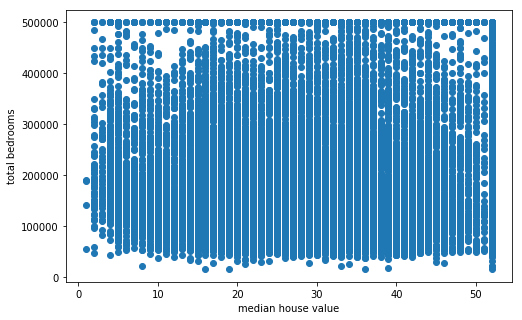

In [65]:
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(y=data["median_house_value"],
            x = data["housing_median_age"])
plt.xlabel("median house value")
plt.ylabel("total bedrooms")

In [66]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


The diagonal values are 1. Median income seems to be positively correlated with the median_house_values

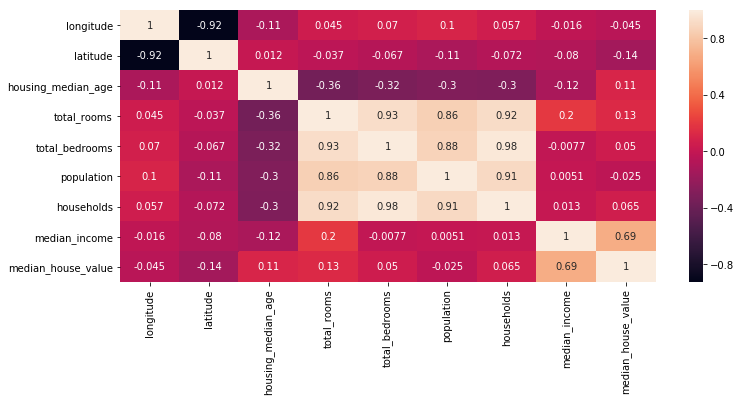

In [67]:
plt.subplots(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

The bright squares means the variables are positively correlated whereas the the darker squares mean that the variables are negatively correlated. We can see that for median_house_value, median_income has the most positive correlation and poplation seems to the most negative correlation.

Conclusions : visual analysis gave us an easy insights into the statistics of the data

## Preparing the data to feed it into the model

In [68]:
data = data.drop(data.loc[data["median_house_value"]==500001].index)

There seems to be some data with a cap value of 500001. We can remove these because they can skew the results of our model.

In [69]:
data.shape

(19475, 10)

In [70]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We do one hot encoding in the column ocean_proximity

In [71]:
data = pd.get_dummies(data,columns=['ocean_proximity'])

In [72]:
data.shape

(19475, 14)

In [73]:
data.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9976,-122.47,38.60,20.0,1036.0,202.0,589.0,194.0,5.3698,303300.0,0,1,0,0,0
17192,-119.77,34.44,24.0,5652.0,1313.0,2312.0,1294.0,2.4717,295300.0,0,0,0,0,1
7300,-118.20,33.99,33.0,1134.0,375.0,1615.0,354.0,2.1468,141700.0,1,0,0,0,0
8046,-118.17,33.84,45.0,1533.0,331.0,791.0,335.0,3.4605,186600.0,1,0,0,0,0


In [74]:
X = data.drop("median_house_value",axis=1)
y = data["median_house_value"]

In [75]:
X.shape, y.shape

((19475, 13), (19475,))

In [76]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

We split the dataset into training and test set

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [117]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [134]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=False).fit(x_train,y_train)

print("Training score : ", linear_model.score(x_train,y_train))

In [135]:
print("Training score : ", linear_model.score(x_train,y_train))
# training score is r square for linear regression

Training score :  0.6127385196628179


In [136]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [137]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()
coef

ocean_proximity_INLAND        -60497.525869
ocean_proximity_NEAR BAY      -29080.547363
longitude                     -24277.561744
ocean_proximity_<1H OCEAN     -22311.221591
latitude                      -22068.221605
ocean_proximity_NEAR OCEAN    -16664.850597
population                       -28.566251
total_rooms                       -7.443305
households                        41.585646
total_bedrooms                    89.764263
housing_median_age               926.004307
median_income                  38808.824112
ocean_proximity_ISLAND        128554.145420
dtype: float64

the negative values represent that these are the features that tend to lower the value of the house. The higher values indicate that these feature tend to increase the median value of the house

In [138]:
y_pred = linear_model.predict(x_test)

In [139]:
df_pred_actual = pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
4031,293522.039529,443600.0
13728,120758.762266,122300.0
794,199036.616049,182100.0
16523,161018.417154,135300.0
19501,96411.162460,75500.0
4524,116960.487104,151600.0
1408,186859.674077,235700.0
16858,226162.238925,242500.0
2561,153299.806565,74100.0
4878,151524.634734,312500.0


In [140]:
from sklearn.metrics import r2_score
print("Testing score : ", r2_score(y_test,y_pred))

Testing score :  0.6130085512111099


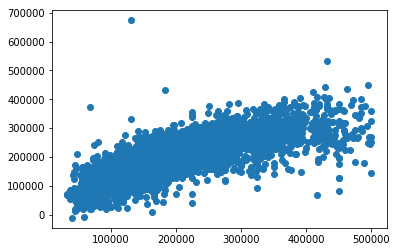

In [141]:
plt.scatter(y_test,y_pred)

In [142]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [143]:
df_pred_actual_sample.head()

,index,predicted,actual
0,5688,352162.674317,380100.0
1,15801,313318.952603,386100.0
2,9614,56750.151517,73300.0
3,2127,121401.238830,74600.0
4,17613,248537.735460,288200.0


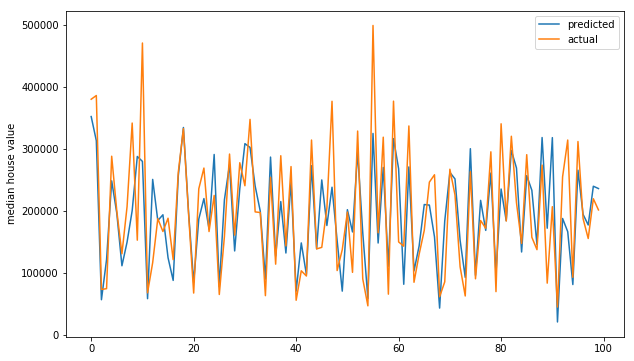

In [144]:
plt.figure(figsize = (10,6))
plt.plot(df_pred_actual_sample["predicted"],label="predicted")
plt.plot(df_pred_actual_sample["actual"],label="actual")
plt.ylabel("median house value")
plt.legend()
plt.show()

This is good way to visualize the comparision between the actual value and predicted value by our model